## P6.5.1
-----

In [6]:
import numpy as np


constants = np.array(
    [299792458, 6.67384e-11, 1.054571726e-34, 8.9875517873681764e9, 1.3806488e-23]
)
relationship_matrix = np.array(
    [
        [1, 0, -1, 0, 0],
        [3, -1, -2, 0, 0],
        [2, 1, -1, 0, 0],
        [3, 1, -2, -2, 0],
        [2, 1, -2, 0, -1],
    ]
)

inv_relationship_matrix = np.linalg.inv(relationship_matrix)

plank_set = np.prod(constants**inv_relationship_matrix, axis=1)

dimensions = ("length", "mass", "time", "charge", "temperature")
si_units = ("m", "kg", "s", "C", "K")
for dimension, quantity, unit in zip(dimensions, plank_set, si_units):
    print(f"Planck {dimension}: {quantity:.3e} {unit}")


Planck length: 1.616e-35 m
Planck mass: 2.177e-08 kg
Planck time: 5.391e-44 s
Planck charge: 1.876e-18 C
Planck temperature: 1.417e+32 K


## P6.5.2
-----

In [3]:
import numpy as np


u, h, c = 1.66053886e-27, 6.62606957e-34, 2.99792458e8


def calculate_inertia_tensor(data: np.ndarray) -> np.ndarray:
    """
    Calculates the inertia tensor of a set of data.
    params:
        data: numpy array of shape (n, 3)
    returns:
        inertia_tensor: numpy array of shape (3, 3)
    """
    data_mean = np.mean(data, axis=0)
    data_centered = data - data_mean
    Ixx = np.sum(data[:, 0] * (data[:, 2] ** 2 + data[:, 3] ** 2))
    Iyy = np.sum(data[:, 0] * (data[:, 1] ** 2 + data[:, 3] ** 2))
    Izz = np.sum(data[:, 0] * (data[:, 1] ** 2 + data[:, 2] ** 2))
    Ixy = -np.sum(data[:, 0] * data[:, 1] * data[:, 2])
    Iyz = -np.sum(data[:, 0] * data[:, 2] * data[:, 3])
    Ixz = -np.sum(data[:, 0] * data[:, 1] * data[:, 3])
    I = np.array([[Ixx, Ixy, Ixz], [Ixy, Iyy, Iyz], [Ixz, Iyz, Izz]])
    return I


def get_principal_moments_of_inertia(inertia_tensor: np.ndarray) -> np.ndarray:
    """
    Calculates the principal moments of inertia of a set of data.
    params:
        inertia_tensor: numpy array of shape (3, 3)
    returns:
        principal_moments_of_inertia: numpy array of shape (3,)
    """
    eigenvalues = np.linalg.eigvals(inertia_tensor)
    return np.sort(eigenvalues)


def classify_molecules(A, B, C) -> str:
    if np.isclose(A, B):
        if np.isclose(B, C):
            return "Spherical top"
        return "Oblate symmetric top"
    if np.isclose(B, C):
        return "Prolate symmetric top"
    return "Asymmetric top"


names = ["CH3Cl", "CH4", "NH3", "O3"]
for chemical_name in names:
    data = np.loadtxt(
        "C:/Users/Arjun Sarao/Learn-Scientific-Programming-with-Python-Solutions/LSPwP_accompanying_files/"
        + chemical_name
        + ".dat",
        skiprows=2,
    )
    inertia_tensor = calculate_inertia_tensor(data)
    principal_moments_of_inertia = get_principal_moments_of_inertia(inertia_tensor)
    principal_moments_of_inertia *= u / 1.0e20
    A, B, C = h / 8 / np.pi**2 / c / 100 / principal_moments_of_inertia
    rotor_type = classify_molecules(A, B, C)
    print(f"{chemical_name} inertia tensor:")
    print(inertia_tensor)
    print(f"{chemical_name} principal moments of inertia:")
    print(principal_moments_of_inertia)
    print(f"{chemical_name} rotor type: {rotor_type}")
    print()


CH3Cl inertia tensor:
[[113.02273714  -0.          -0.        ]
 [ -0.         113.02290049  -0.        ]
 [ -0.          -0.           3.28538231]]
CH3Cl principal moments of inertia:
[5.45550499e-47 1.87678647e-45 1.87678918e-45]
CH3Cl rotor type: Prolate symmetric top

CH4 inertia tensor:
[[ 3.17594741 -0.         -0.        ]
 [-0.          3.17594741 -0.        ]
 [-0.         -0.          3.17594741]]
CH4 principal moments of inertia:
[5.27378409e-47 5.27378409e-47 5.27378409e-47]
CH4 rotor type: Spherical top

NH3 inertia tensor:
[[ 1.76974277e+00 -0.00000000e+00 -0.00000000e+00]
 [-0.00000000e+00  1.76973986e+00  3.84614640e-05]
 [-0.00000000e+00  3.84614640e-05  2.65886896e+00]]
NH3 principal moments of inertia:
[2.93872181e-47 2.93872665e-47 4.41515523e-47]
NH3 rotor type: Oblate symmetric top

O3 inertia tensor:
[[52.24991091 -0.         -0.        ]
 [-0.         14.3473642  -0.        ]
 [-0.         -0.         37.90254671]]
O3 principal moments of inertia:
[2.38243558e-4

## P6.5.3
-----

In [28]:
import numpy as np

np.random.seed(0)
M = np.random.random((3, 3))

U, S, V = np.linalg.svd(M)
svd_eigenvalues = S * S


def get_sorted_eigen_stuff(matrix: np.ndarray) -> tuple:
    """
    Calculate and return the sorted eigenvalues and eigenvectors of a matrix.
    """
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    sorted_indexes = np.argsort(eigenvalues)[::-1]
    return eigenvalues[sorted_indexes], eigenvectors[:, sorted_indexes]


print("MM* by numpy.linalg.eig:")
evals, evecs = get_sorted_eigen_stuff(np.dot(M, M.T))
print("Compare eigenvalues:")
print(evals, svd_eigenvalues, sep="\n")
print(f"Eigenvalues equal: {np.allclose(evals, svd_eigenvalues)}")
print("Compare eigenvectors:")
print(evecs, U, sep="\n")
print("Eigenvectors equivalent: ", np.allclose(abs((evecs * U).sum(axis=0)), 1))
print("-" * 70)

print("M*M by numpy.linalg.eig:")
evals, evecs = get_sorted_eigen_stuff(np.dot(M.T, M))
print("Compare eigenvalues:")
print(evals, svd_eigenvalues, sep="\n")
print(f"Eigenvalues equal: {np.allclose(evals, svd_eigenvalues)}")
print("Compare eigenvectors:")
print(evecs, V.T, sep="\n")
print("Eigenvectors equivalent: ", np.allclose(abs((evecs * V.T).sum(axis=0)), 1))
print("-" * 70)


MM* by numpy.linalg.eig:
Compare eigenvalues:
[3.89040058 0.06749849 0.02706455]
[3.89040058 0.06749849 0.02706455]
Eigenvalues equal: True
Compare eigenvectors:
[[ 0.54485754 -0.22481968  0.80782819]
 [ 0.4678586  -0.71798254 -0.51537307]
 [ 0.69587254  0.65875426 -0.28601438]]
[[-0.54485754 -0.22481968 -0.80782819]
 [-0.4678586  -0.71798254  0.51537307]
 [-0.69587254  0.65875426  0.28601438]]
Eigenvectors equivalent:  True
----------------------------------------------------------------------
M*M by numpy.linalg.eig:
Compare eigenvalues:
[3.89040058 0.06749849 0.02706455]
[3.89040058 0.06749849 0.02706455]
Eigenvalues equal: True 

Compare eigenvectors:
[[-0.43523327 -0.87118606 -0.2271714 ]
 [-0.61267551  0.4714844  -0.63429582]
 [-0.65969745  0.13688429  0.73896006]]
[[-0.43523327 -0.87118606 -0.2271714 ]
 [-0.61267551  0.4714844  -0.63429582]
 [-0.65969745  0.13688429  0.73896006]]
Eigenvectors equivalent:  True
---------------------------------------------------------------------

## P6.5.4
-----

In [4]:
import numpy as np

M = np.matrix([[10, 1], [0, 9]])
F_0 = np.matrix([[0], [1]])

for n in range(1, 11):
    p_n = (M**n * F_0)[0]
    print(p_n, p_n == 10**n - 9**n)

[[1]] [[ True]]
[[19]] [[ True]]
[[271]] [[ True]]
[[3439]] [[ True]]
[[40951]] [[ True]]
[[468559]] [[ True]]
[[5217031]] [[ True]]
[[56953279]] [[ True]]
[[612579511]] [[ True]]
[[-2076718993]] [[False]]


## P6.5.5
-----

In [11]:
import numpy as np

F = np.matrix([[1, 1], [1, 0]])
# The nth fibonacci number is the first element of F^n


(lambda_1, lambda_2), C = np.linalg.eig(F)
C_inv = np.linalg.inv(C)

D = np.matrix([[lambda_1**1100, 0], [0, lambda_2**1100]])
M = C * D * C_inv

print(f"The 1100th fibonacci number is: {int(M[0,0])}")


The 1100th fibonacci number is 55706633420033572391917105807681653946560952943570911866315186384142110819606288815884771271086976048848445003192775222254740738341928009538673637070103206401855027754450388266001653416407450093253142182454458005963962887176192000


## P6.5.6
-----

In [19]:
import numpy as np


def classify_conic_section(
    A: float, B: float, C: float, D: float, E: float, F: float
) -> str:
    """
    Classifies a conic section as one of the following:
        - Ellipse
        - Hyperbola
        - Parabola
        - Other

    params:
        A: float
        B: float
        C: float
        D: float
        E: float
        F: float
    returns:
        conic_section_type: str
    """
    Q = np.matrix([[A, B / 2, D / 2], [B / 2, C, E / 2], [D / 2, E / 2, F]])
    Q_33 = Q[:2, :2]

    if np.linalg.det(Q) == 0:
        if np.linalg.det(Q_33) == 0:
            return "Parallel Lines"
        elif np.linalg.det(Q_33) < 0:
            return "Two Intersecting Lines"
        else:
            return "Single Point"
    else:
        if np.linalg.det(Q_33) == 0:
            return "Parabola"
        elif np.linalg.det(Q_33) < 0:
            return "Hyperbola"
        elif A == C and B == 0:
            return "Circle"
        else:
            return "Ellipse"


print(classify_conic_section(0, 1, 0, 0, 0, -9) == "Hyperbola")
print(classify_conic_section(0.5, 0, 0, 2, -0.5, 0) == "Parabola")
print(classify_conic_section(0.5, 0, 0.5, -2, -3, 2) == "Circle")
print(classify_conic_section(9, 0, 4, 0, 0, -36) == "Ellipse")
print(classify_conic_section(1, 0, 0, 0, 0, -1) == "Parallel Lines")
print(classify_conic_section(1, 0, 1, 0, 0, 0) == "Single Point")


True
True
True
True
True
True


## P6.5.7
-----

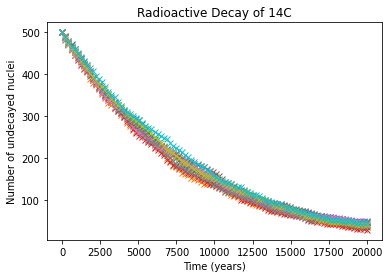

Fitted parameters: N0 = 511.14688017708113, half-life = 5478.0 years


In [38]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt(
    "C:/Users/Arjun Sarao/Learn-Scientific-Programming-with-Python-Solutions/LSPwP_accompanying_files/14C-sim.csv",
    skiprows=2,
    delimiter=",",
)

# Plot the data, for fun
for i in range(10):
    plt.plot(data[:, 0], data[:, i + 1], "x")
plt.title("Radioactive Decay of 14C")
plt.xlabel("Time (years)")
plt.ylabel("Number of undecayed nuclei")
plt.show()

# Seperate the data into time and points
time = data[:, 0]
num_points = len(data)
Nsim = data[:, 1:]
N = Nsim.mean(axis=1)

A = np.vstack((time, np.ones(num_points))).T
logN = np.log(N)

x, residuals, _, _ = np.linalg.lstsq(A, logN, rcond=None)
m, c = x

N_0, tau = np.exp(c), -m
t_half = np.log(2) / tau

print(f"Fitted parameters: N0 = {N_0}, half-life = {t_half:.1f} years")
